In [ ]:
import numpy as np
import torch.optim as optim

In [ ]:
a=np.arange(0,24).reshape(2,3,4)
b=np.arange(0,2)
c=(None,slice(None))*3
a[c].shape,a.shape

In [ ]:
import numpy as np

class Petri_net(object):
    def __init__(self,mat_pre,mat_post,m0):
        self.mat_pre=mat_pre
        self.mat_post=mat_post
        self.mat=self.mat_post-self.mat_pre
        self.m=m0

    def is_tansition(self):
        self.tran=(self.m[:,None]>=self.mat_pre).all(0).nonzero()[0]   
        return  np.where(self.tran.size,True,False)  

    def firing(self,T):
        self.m=self.m+self.mat[:,T]     


mat_pre = np.loadtxt("D:\\petri_learning\\c.pre.txt")
mat_post = np.loadtxt("D:\\petri_learning\\c.post.txt")
m0 = np.loadtxt("D:\\petri_learning\\m0.txt")
petri_net=Petri_net(mat_pre,mat_post,m0)  
print(petri_net.mat) 
print("初始标识：",petri_net.m)
for x in range(10):
    if petri_net.is_tansition():  #判断是否存在可激发变迁
        tran_enable=np.random.choice(petri_net.tran)  #随机选择一个可激发变迁
    else:
        print("\n无可激发变迁！")
        break
    petri_net.firing(tran_enable)    #激发变迁
    print("\n可激发变迁：",petri_net.tran+1)
    print("激发变迁：",tran_enable+1)
    print("当前标识：",petri_net.m)





In [6]:
import numpy as np

class Petri_net(object):
    def __init__(self,mat_pre,mat_post,m0):
        self.mat_pre=mat_pre
        self.mat_post=mat_post
        self.mat=self.mat_post-self.mat_pre
        self.m=m0

    def is_tansition(self,M):   #获得新节点的可激发变迁 返回可激发变迁是否为空
        self.Te=(M[:,None]>=self.mat_pre).all(0).nonzero()[0]   
        return  np.where(self.Te.size,True,False)    

    def firing(self,T,M):       ##随机选择一变迁激发  
        self.m=M+self.mat[:,T]   
        return self.m

class Graph_E(object):
    def __init__(self,node_name ):
        self.node_name=node_name
        self.edge = {node_name:[]}


    def append_head_node(self,head_node):
        self.edge.update({head_node:[]})

    def append_next_node(self,head_node, node_name):
        
        self.edge[head_node].append(node_name)


    def append_head_node(self,head_node):
        self.edge.update({head_node:[]})

    def append_next_node(self,head_node, node_name):
        
        self.edge[head_node].append(node_name)

class Graph_V(Petri_net):
    def __init__(self,mat_pre,mat_post,m0):
        super().__init__(mat_pre,mat_post,m0)
        self.mat_pre=mat_pre
        self.mat_post=mat_post
        self.mat=self.mat_post-self.mat_pre
        self.m=m0
        self.Vnew={0:m0}
        self.V={0:m0}
        self.num=0
    
    def is_empty_Vnew(self):  ##判断Vnew是否为空
        return np.where(len(self.Vnew),True,False)

    def is_empty_Te(self):    ##判断Te是否为空
        return np.where(len(self.Te),True,False)

    def node_choose(self):    ##从Vnew选择新节点
        #temp=np.random.choice(list(self.Vnew.keys()))
        temp=list(self.Vnew.keys())[0]
        return temp

    def Te_choose(self):    ##从Te选择一个可激发变迁
        ##temp=np.random.choice(self.Te)
        temp=self.Te[0]
        return temp

    def Vnew_delete(self,num): ##从Vnew删除选择节点
        self.Vnew.pop(num)

    def T_delete(self,t):     ##并从Te中删除
        self.Te=[x for x in self.Te if x!=t]
    
    def is_new_node(self,m_new):  ##判断新节点是否在V中出现过
        temp=np.array([list(item) for item in self.V.values()])
        return np.where((temp==m_new[:None]).all(1).nonzero()[0].size,False,True)

    def node_update(self):
        self.num+=1
        self.Vnew.update({self.num:self.m})
        self.V.update({self.num:self.m})


def get_node_num(Dict,m):
    return [k for k, v in Dict.items() if (v == m).all(0)][0]

mat_pre = np.loadtxt("D:\\petri_learning\\c.pre.txt")
mat_post = np.loadtxt("D:\\petri_learning\\c.post.txt")
m0 = np.loadtxt("D:\\petri_learning\\m0.txt")
    

graph_v=Graph_V(mat_pre,mat_post,m0)
graph_e=Graph_E(0)

while(graph_v.is_empty_Vnew()):
    new_node=graph_v.node_choose()       #步骤4  从任意Vnew中选取新节点m
    graph_v.is_tansition(graph_v.V[new_node]) #步骤5  获得m可激发变迁Te
    graph_v.Vnew_delete(new_node)        #       并删除Vnew
    graph_e.append_head_node(new_node)
    while(graph_v.is_empty_Te()):
        tran_enable=graph_v.Te_choose()      #步骤6  从Te中随机选择一个可激发变迁
        graph_v.T_delete(tran_enable)        #       并将该变迁从Te中删除
        graph_v.firing(tran_enable,graph_v.V[new_node])          #步骤7  激发变迁  得到m'
        if graph_v.is_new_node(graph_v.m):        #步骤8  判断m'是不是新出现节点
            graph_v.node_update()            #       是  则更新V_new  V  W E

        print(new_node,tran_enable,get_node_num(graph_v.V,graph_v.m))
        graph_e.append_next_node(new_node,get_node_num(graph_v.V,graph_v.m))
    

graph_e.edge,graph_v.V



0 0 1
1 0 2
1 1 3
1 2 4
2 0 5
2 1 6
2 2 7
3 0 6
3 2 8
4 0 7
4 1 8
5 1 9
5 2 10
6 0 9
6 1 11
6 2 12
7 0 10
7 1 12
7 2 13
8 0 12
8 3 0
9 1 14
9 2 15
10 1 15
10 2 16
11 0 14
11 2 17
12 0 15
12 1 17
12 2 18
12 3 1
13 0 16
13 1 18
14 1 19
14 2 20
15 1 20
15 2 21
15 3 2
16 1 21
16 2 22
17 0 20
17 2 23
17 3 3
18 0 21
18 1 23
18 3 4
19 2 24
20 1 24
20 2 25
20 3 6
21 1 25
21 2 26
21 3 7
22 1 26
23 0 25
23 3 8
24 2 27
24 3 11
25 1 27
25 2 28
25 3 12
26 1 28
26 3 13
27 2 29
27 3 17
28 1 29
28 3 18
29 3 23


({0: [1],
  1: [2, 3, 4],
  2: [5, 6, 7],
  3: [6, 8],
  4: [7, 8],
  5: [9, 10],
  6: [9, 11, 12],
  7: [10, 12, 13],
  8: [12, 0],
  9: [14, 15],
  10: [15, 16],
  11: [14, 17],
  12: [15, 17, 18, 1],
  13: [16, 18],
  14: [19, 20],
  15: [20, 21, 2],
  16: [21, 22],
  17: [20, 23, 3],
  18: [21, 23, 4],
  19: [24],
  20: [24, 25, 6],
  21: [25, 26, 7],
  22: [26],
  23: [25, 8],
  24: [27, 11],
  25: [27, 28, 12],
  26: [28, 13],
  27: [29, 17],
  28: [29, 18],
  29: [23]},
 {0: array([3., 0., 0., 0., 0.]),
  1: array([2., 1., 1., 0., 0.]),
  2: array([1., 2., 2., 0., 0.]),
  3: array([2., 0., 1., 1., 0.]),
  4: array([2., 1., 0., 0., 1.]),
  5: array([0., 3., 3., 0., 0.]),
  6: array([1., 1., 2., 1., 0.]),
  7: array([1., 2., 1., 0., 1.]),
  8: array([2., 0., 0., 1., 1.]),
  9: array([0., 2., 3., 1., 0.]),
  10: array([0., 3., 2., 0., 1.]),
  11: array([1., 0., 2., 2., 0.]),
  12: array([1., 1., 1., 1., 1.]),
  13: array([1., 2., 0., 0., 2.]),
  14: array([0., 1., 3., 2., 0.]),
  1

In [ ]:


[k for k, v in graph_v.V.items() if (v == graph_v.m).all(0)][0]

In [ ]:
graph_v.m

In [ ]:
modified_array = np.delete(a,(a==b).all(1).nonzero()[0],0)
modified_array

In [27]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def graph_showing(data):
    '''
    args:
         data: torch_geometric.data.Data
    '''
    G = nx.Graph()
    edge_index = data['edge_index'].t()
#     print(edge_index)
    edge_index = np.array(edge_index.cpu())
#     print(edge_index)
    
    G.add_edges_from(edge_index)
    nx.draw(G)
    plt.show()



In [30]:
dataset.data['edge_index'].t()

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        ...,
        [47, 24],
        [47, 29],
        [47, 30]])

In [28]:
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root='./data/ENZYMES', name='ENZYMES')

#for data in dataset:
#    print(data)
#     print(data['edge_index'])
#     print(data.is_directed())
#     print(data.num_edges)
#    graph_showing(data)


In [5]:

dataset.data.is_directed()

False

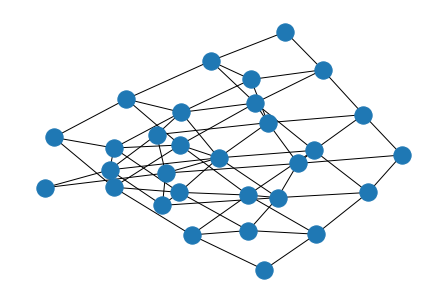

In [52]:

x=torch.arange(1,9,1)
edge_index=[
[0,1],
[1,2],
[1 ,3],
[1 ,4],
[2 ,5],
[2 ,6],
[2 ,7],
[3 ,6],
[3 ,8],
[4 ,7],
[4 ,8],
[5 ,9],
[5 ,10],
[6 ,9],
[6 ,11],
[6 ,12],
[7 ,10],
[7 ,12],
[7 ,13],
[8 ,12],
[8 ,0],
[9 ,14],
[9 ,15],
[10  ,15],
[10  ,16],
[11  ,14],
[11  ,17],
[12  ,15],
[12  ,17],
[12  ,18],
[12  ,1],
[13  ,16],
[13  ,18],
[14  ,19],
[14  ,20],
[15  ,20],
[15  ,21],
[15  ,2],
[16  ,21],
[16 , 22],
[17  ,20],
[17  ,23],
[17  ,3],
[18  ,21],
[18  ,23],
[18  ,4],
[19  ,24],
[20  ,24],
[20  ,25],
[20  ,6],
[21  ,25],
[21  ,26],
[21  ,7],
[22  ,26],
[23  ,25],
[23  ,8],
[24  ,27],
[24  ,11],
[25  ,27],
[25  ,28],
[25  ,12],
[26 ,28],
[26 ,13],
[27,29],
[27,17],
[28,29],
[28,18],
[29,23]]
edge_index = np.array(edge_index)
G = nx.Graph()
G.add_edges_from(edge_index)
nx.draw(G)
plt.show()


In [7]:
def process(self):
        # Read data into huge `Data` list.
        data_list = [...]
 
        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]
 
        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]
 
        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])


In [21]:
def process(self):
    # Read data into huge `Data` list.
    #这里用于构建data
    Edge_index = torch.tensor([[0, 1, 1, 2],
                               [1, 0, 2, 1]], dtype=torch.long)
 
    # 每个节点的特征：从0号节点开始。。
    X = torch.tensor([[-1], [0], [1]], dtype=torch.float)
    # 每个节点的标签：从0号节点开始-两类0，1
    Y = torch.tensor([[0, 0], [1, 1], [2, 0]],dtye=torch.float)
 
    data = Data(x=x, edge_index=edge_index, y=Y)
    #放入datalist
    data_list = [data]
 
    if self.pre_filter is not None:
        data_list = [data for data in data_list if self.pre_filter(data)]
 
    if self.pre_transform is not None:
        data_list = [self.pre_transform(data) for data in data_list]
 
    data, slices = self.collate(data_list)
    torch.save((data, slices), self.processed_paths[0])


In [52]:
import torch
from torch_geometric.data import InMemoryDataset, download_url
 
#这里给出大家注释方便理解
class MyOwnDataset(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None):
        super().__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])
    #返回数据集源文件名
    @property
    def raw_file_names(self):
        return ['some_file_1', 'some_file_2', ...]
    #返回process方法所需的保存文件名。你之后保存的数据集名字和列表里的一致
    @property
    def processed_file_names(self):
        return ['data.pt']
    # #用于从网上下载数据集
    # def download(self):
    #     # Download to `self.raw_dir`.
    #     download_url(url, self.raw_dir)
        ...
    #生成数据集所用的方法
    def process(self):
        # Read data into huge `Data` list.
        # Read data into huge `Data` list.
        # 这里用于构建data
        Edge_index = torch.tensor([[0, 1, 1, 2],
                                   [1, 0, 2, 1]], dtype=torch.long)
 
        # 每个节点的特征：从0号节点开始。。
        X = torch.tensor([[-1], [0], [1]], dtype=torch.float)
        # 每个节点的标签：从0号节点开始-两类0，1
        Y = torch.tensor([0, 1, 0],dtype=torch.float)
 
        data = Data(x=x, edge_index=edge_index, y=Y)
        # 放入datalist
        data_list = [data]
 
        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]
 
        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]
 
        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])


In [46]:

b = MyOwnDataset("MYdata")


In [50]:
b.data.edge_index.t()


tensor([[0, 1],
        [1, 0],
        [1, 2],
        [2, 1]])

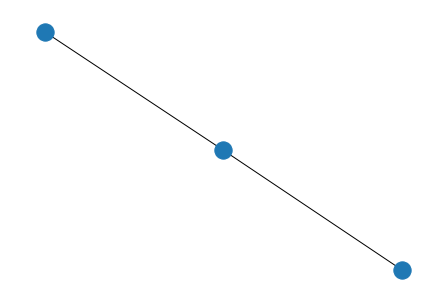

In [51]:
G = nx.Graph()
edge_index = b.data.edge_index.t()
edge_index = np.array(edge_index)
G.add_edges_from(edge_index)
nx.draw(G)
plt.show()

